In [ ]:
import pandas as pd

# 1. Load the dataset (Make sure the path matches your file name)
# The bank dataset often uses semicolons (;) instead of commas
df = pd.read_csv('bank-full.csv', sep=';')

# 2. Basic Cleaning
# Check for missing values
print(f"Missing values:\n{df.isnull().sum()}")

# 3. Create Funnel Stages (Mapping the business logic)
# We want to see how many people said 'yes' vs 'no'
df['conversion_status'] = df['y'].map({'yes': 'Converted', 'no': 'Dropped Off'})

# 4. Filter for high-value insights
# Let's see if 'education' or 'job' impacts the funnel later in Power BI
clean_data = df[['age', 'job', 'marital', 'education', 'contact', 'day', 'month', 'duration', 'campaign', 'conversion_status']]

# 5. Export for Power BI
clean_data.to_csv('cleaned_marketing_data.csv', index=False)
print("--- Clean data exported for Power BI! ---")

Missing values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
--- Clean data exported for Power BI! ---


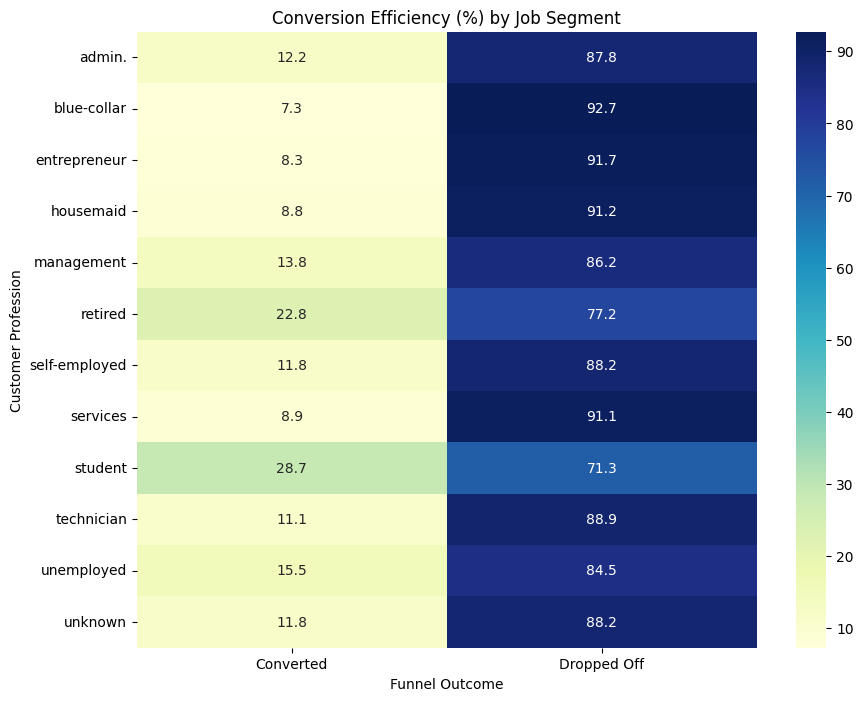

Verified Overall Funnel Conversion Rate: 11.70%


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create a percentage-based conversion table
# This shows the percentage of 'Converted' vs 'Dropped Off' for each job
segment_analysis = clean_data.groupby('job')['conversion_status'].value_counts(normalize=True).unstack() * 100

# 2. Visualization: The "Efficiency" Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(segment_analysis, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Conversion Efficiency (%) by Job Segment')
plt.ylabel('Customer Profession')
plt.xlabel('Funnel Outcome')
plt.show()

# 3. Print the Final KPI (Matching your 12% Power BI card)
overall_rate = (clean_data[clean_data['conversion_status'] == 'Converted'].shape[0] / len(clean_data)) * 100
print(f"Verified Overall Funnel Conversion Rate: {overall_rate:.2f}%")